<a href="https://colab.research.google.com/github/artiagra/Python-for-Data-science/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [0]:
import io

pima = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#split data into features and target variable
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction'] 
X = pima[feature_cols] #features
y = pima.Outcome  #Outcome

In [0]:
#split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1) # 70% training & 30% test

In [7]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = clf.predict(X_test)

In [9]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.670995670995671


In [0]:
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)

clf1.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)


In [23]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred1))

Accuracy : 0.7878787878787878


In [12]:
y_test.head(10)

285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
Name: Outcome, dtype: int64

In [36]:
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


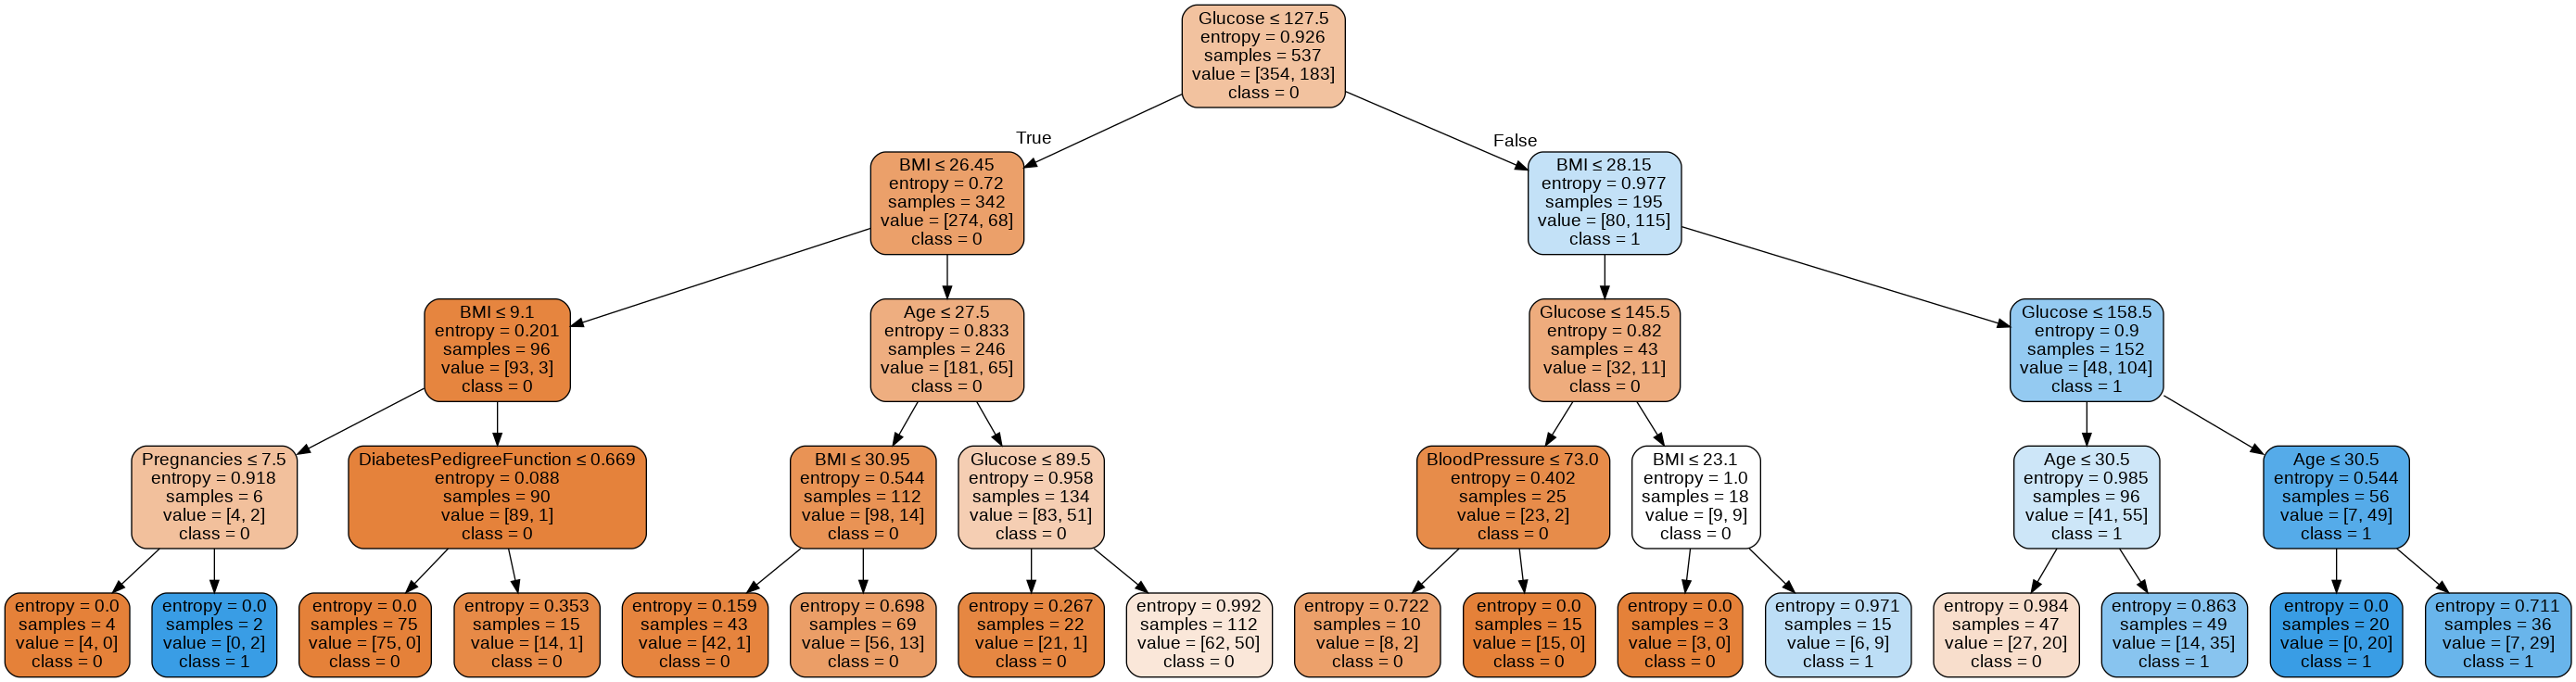

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())